In [10]:
import numpy as np
from matplotlib import pyplot as plt
import random

## Data generation functions

In [5]:
def generate(N):
    x1 = np.random.uniform(1, 5, size=(N,))
    x2 = np.random.uniform(10,100, size=(N,))
    X = np.column_stack((x1, x2))
    i = random.randint(0,N/2-1)
    j = random.randint(N/2,N-1)
    slope = (x2[j]-x2[i])/(x1[j]-x1[i])
    intercept = x2[j]-x1[j]*slope
    return X, slope, intercept
    
def target_f(slope, intercept, x):
    return slope*x + intercept

def label_y(slope, intcpt, x1, x2):
    y = []
    for i, j in zip(x1, x2):
        if target_f(slope, intercept, i)>j:
            y.append(1)
        else:
            y.append(-1)
    return y

def flipper(y):
    for j in range(int(len(y)/10)):
        i = random.choice(range(len(y)))
        if y[i] == 1:
            y[i] = -1
        else:
            y[i] = 1
    return y

## Perceptron and Pocket algorithms

In [24]:
class Perceptron:
    def __init__(self, X):
        self.weights = np.zeros(shape=len(X[0])+1)
    
    def fit(self, X, y):
        T = 10
        while T>0:
            for i, x in enumerate(X):
                if self.predict(x, self.weights)!=y[i]:
                    x = np.insert(x, 0, 1)
                    self.weights = self.weights + y[i]*x
            T -= 1
        return self.weights
        
    def predict(self, x, w):
        return np.sign(np.dot(np.transpose(w[1:]),x) + w[0])
        

In [25]:
class Pocket:
    def __init__(self, X, y):
        self.weights = np.zeros(shape=len(X[0])+1)
    
    def fit(self, X, y):
        p = Perceptron(X)
        for t in range(1000):
            weights_new = p.fit(X, y)
            error_1 = self.error(X, y, weights_new)
            error_2 = self.error(X, y, self.weights)           
            if error_1 <= error_2:
                self.weights = weights_new
        return self.weights
            
    def predict(self, x, w):
        return np.sign(np.dot(w[1:],x.T) + w[0])

    def error(self, X, y, w):
        error = 0
        for i, x in enumerate(X):
            if self.predict(x, w)!=y[i]:
                error += 1
        return error/len(y)               
        

## Linear regression

In [20]:
import numpy as np

class LinearRegression:

    def __init__(self):
        self.weights = 0

    def fit(self, X, y):
        X = np.insert(X.T, 0, 1, axis=0)
        X_cross = np.matmul(np.linalg.pinv(np.matmul(X, X.T)), X)
        self.weights = np.matmul(X_cross, y)
        return self.weights

    def predict(self, x):
        y_pred = np.sign(np.dot(self.weights.T, x))
        return y_pred

    def error(self, X, y):
        error = 0
        X = np.insert(X.T, 0, 1, axis=0)
        for i, x in enumerate(X.T):
            if self.predict(x)!=y[i]:
                error += 1
        return error/len(y)  


## Generated data

In [11]:
data = generate(100)
X_train, slope, intercept = data[0], data[1], data[2] 
x1, x2 = X_train[:,0], X_train[:,1]
y_train = np.asarray(flipper(np.asarray(label_y(slope, intercept, x1, x2))))
X_test = generate(1000)[0]
x1_test, x2_test = X_test[:,0], X_test[:,1]
y_test = np.asarray(flipper(np.asarray(label_y(slope, intercept, x1_test, x2_test))))

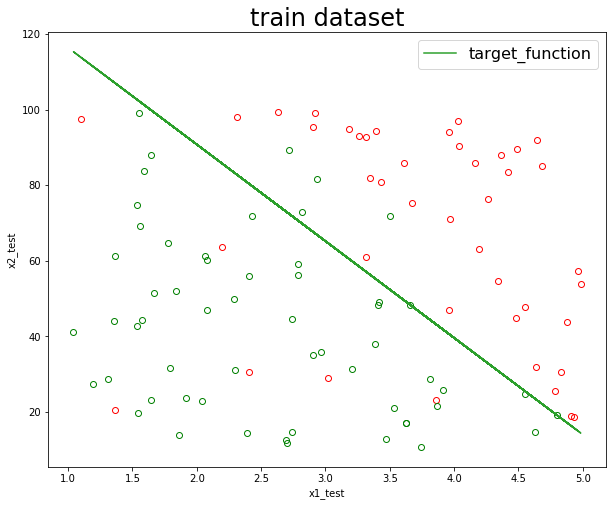

In [12]:
plt.figure(figsize=(10, 8));
plt.title('train dataset', fontsize = 24)

c0 = y_train==-1
c1 = y_train==1
plt.plot(X_train[:,0][c0], X_train[:,1][c0], 'o', mec='r', mfc='none')
plt.plot(X_train[:,0][c1], X_train[:,1][c1], 'o', mec='g', mfc='none')
plt.plot(X_train[:,0], intercept + slope*(X_train[:,0]), label='target_function')
plt.legend(loc='upper right', fontsize='16')
plt.xlabel('x1_test')
plt.ylabel('x2_test')
plt.show()

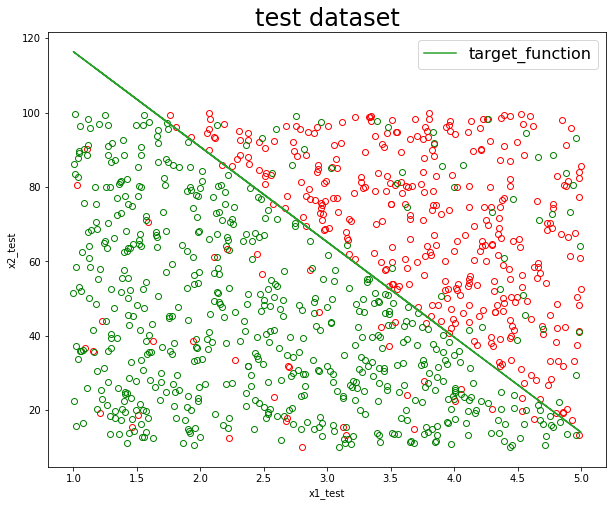

In [13]:
plt.figure(figsize=(10, 8));
plt.title('test dataset', fontsize = 24)

c0 = y_test==-1
c1 = y_test==1
plt.plot(X_test[:,0][c0], X_test[:,1][c0], 'o', mec='r', mfc='none')
plt.plot(X_test[:,0][c1], X_test[:,1][c1], 'o', mec='g', mfc='none')
plt.plot(X_test[:,0], intercept + slope*(X_test[:,0]), label='target_function')
plt.legend(loc='upper right', fontsize='16')
plt.xlabel('x1_test')
plt.ylabel('x2_test')
plt.show()

## Checking pocket accuracy

In [9]:
pocket = Pocket(X_train, y_train)
weights_poc = pocket.fit(X_train, y_train)
y_pp = pocket.predict(X_test, weights_poc)
error_pocket = pocket.error(X_test, y_test, weights_poc)
error_pocket

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


0.092

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pp)

0.908

## Checking linear regression acccuracy

In [21]:
linear = LinearRegression()
weights_lin = linear.fit(X_train, y_train)
error_linear = linear.error(X_test, y_test)
y_ff = linear.predict(np.insert(X_test.T, 0,1, axis=0))

In [22]:
error_linear

0.113

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_ff)

0.887

## Looping 20 times

In [26]:
error_poc, error_lin = [], []
for i in range(100): 
    data = generate(100)
    X_train, slope, intercept = data[0], data[1], data[2] 
    x1, x2 = X_train[:,0], X_train[:,1]
    y_train = np.asarray(flipper(np.asarray(label_y(slope, intercept, x1, x2))))
    X_test = generate(1000)[0]
    x1_test, x2_test = X_test[:,0], X_test[:,1]
    y_test = np.asarray(flipper(np.asarray(label_y(slope, intercept, x1_test, x2_test))))
    pocket = Pocket(X_train, y_train)
    weights = pocket.fit(X_train, y_train)
    error_pocket = pocket.error(X_test, y_test, weights)
    linear = LinearRegression()
    weights = linear.fit(X_train, y_train)
    error_linear = linear.error(X_test, y_test)
    error_poc.append(error_pocket), error_lin.append(error_linear)
    

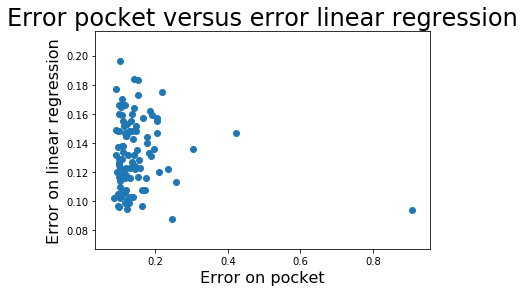

In [27]:
import matplotlib.pyplot as pt

pt.scatter(error_poc, error_lin)
plt.xlabel('Error on pocket', fontsize=16)
plt.ylabel('Error on linear regression', fontsize=16)
plt.title('Error pocket versus error linear regression', fontsize=24)
pt.show()

## Conclusion

For boss I woud definitely recommend linearregression algorithm for him. Because, as you can see from the graph error on pocket is mostly spread out between 0.1 and 0.3 having bad results such as 0.45, 0.8, while linear is spread oot between 0.08 and 0.2, which is very good fit. Moreover, pocket algorithm works very slow.